In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirQuality_visualization.csv' , delimiter=';' , decimal=',')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [5]:
clean_df = df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)

In [6]:
clean_df  = clean_df.dropna()

In [7]:
clean_df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
clean_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [9]:
clean_df.shape

(9357, 15)

In [10]:
clean_df = clean_df.sample(n=2000 , random_state=42)

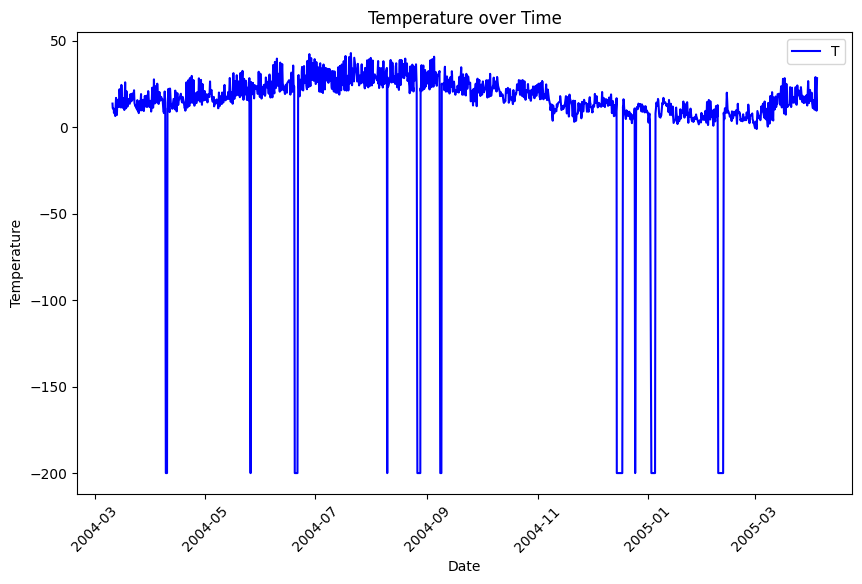

In [48]:
##CREATING VISUALIZATION
##LINE PLOT
clean_df['datetime'] = pd.to_datetime(clean_df['Date'] + ' ' + clean_df['Time'], format='%d/%m/%Y %H.%M.%S')

# Plotting Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=clean_df, x='datetime', y='T', label='T', color='blue')
plt.title('Temperature over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

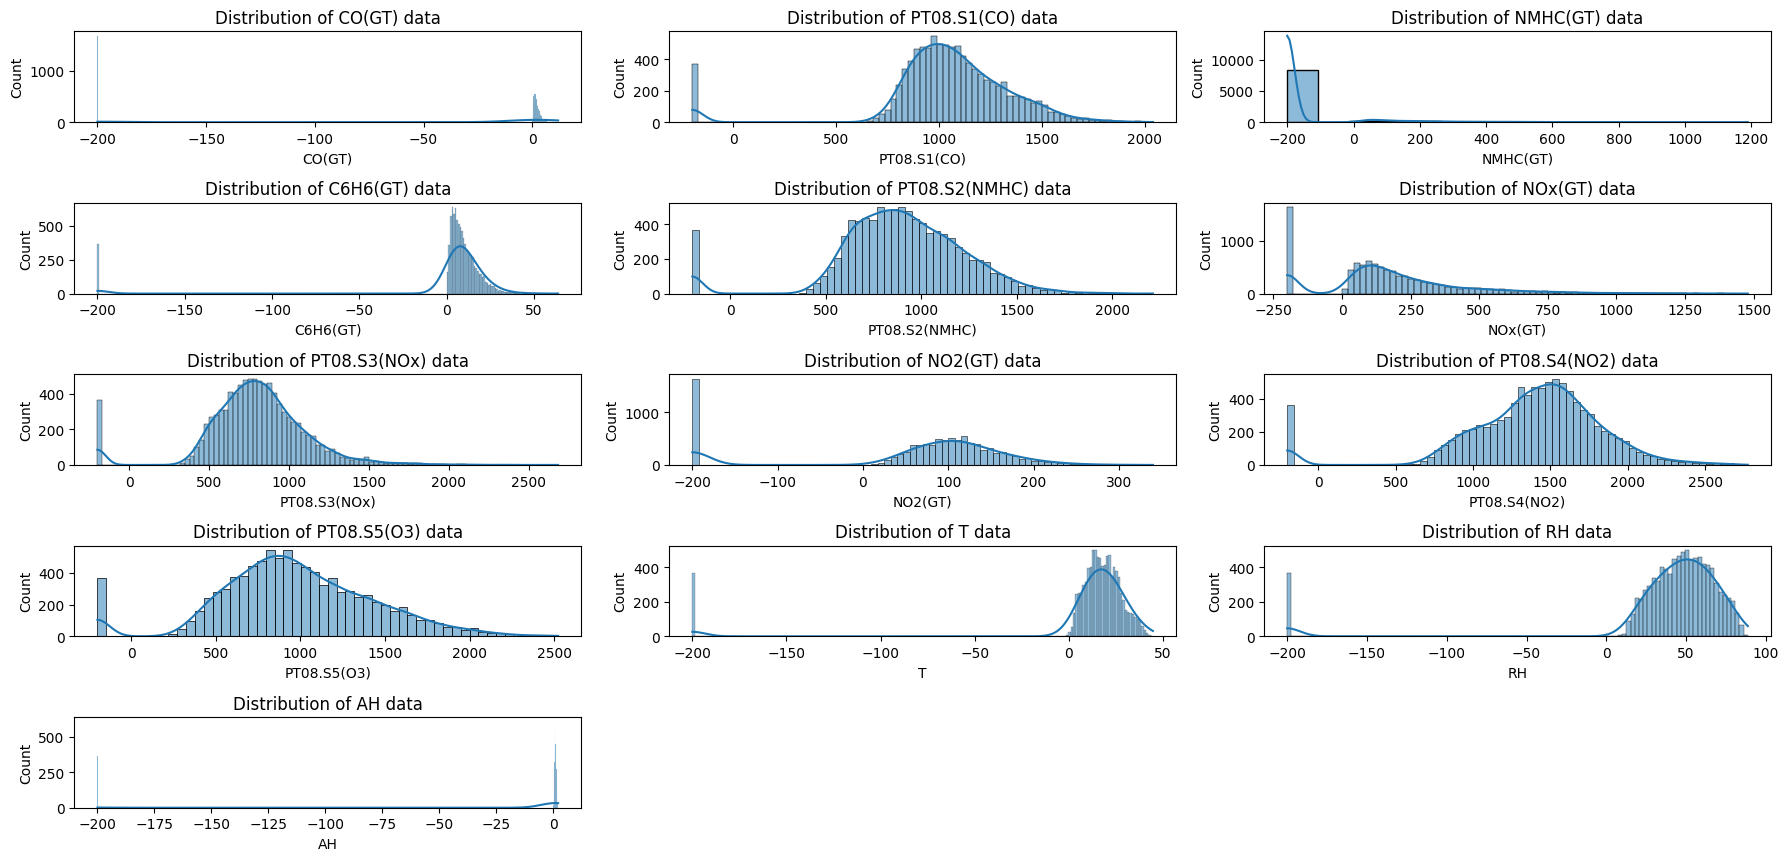

In [19]:
col_name = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'] 

plt.figure(figsize=(18,10))
for i , col in enumerate(col_name , 1):
    plt.subplot(6,3,i)
    plt.title(f'Distribution of {col} data')
    sns.histplot(df[col] , kde=True)
plt.tight_layout()
plt.show()    

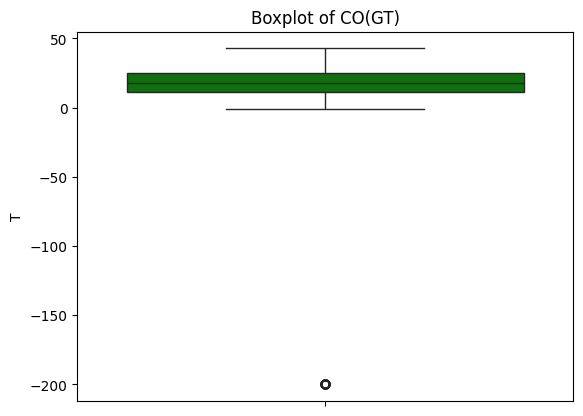

In [28]:
sns.boxplot(data=clean_df , y='T',color='green')
plt.title('Boxplot of CO(GT)')
plt.show()

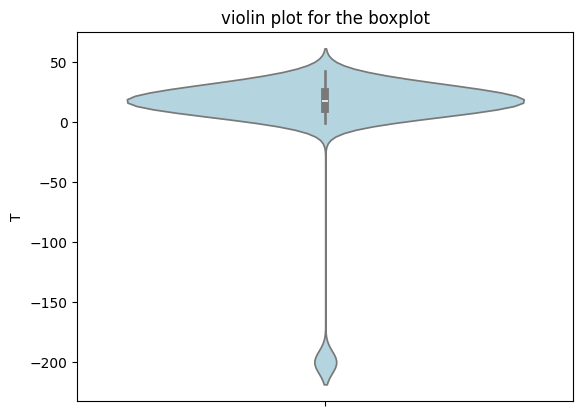

In [30]:
sns.violinplot(data=clean_df , y='T' , color='lightblue')
plt.title('violin plot for the boxplot')
plt.show()

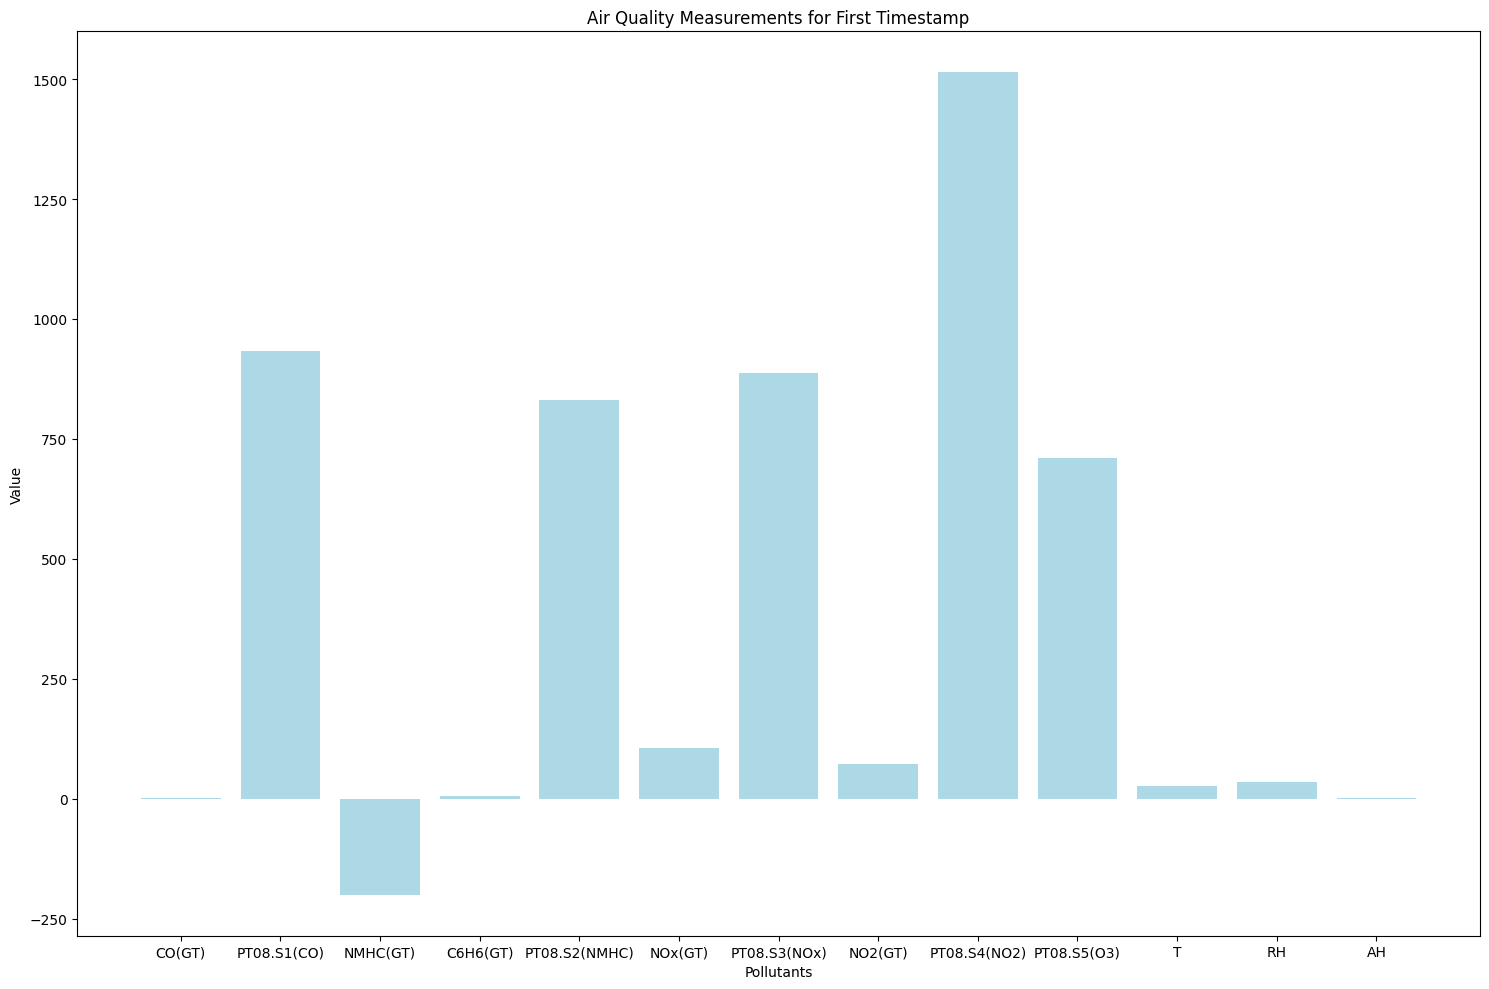

In [50]:
# row=clean_df.iloc[0 , 2:]
# plt.figure(figsize=(15,10))
# sns.barplot(x=row.index , y=row.values , palette='viridis')
# plt.title('BarPlot ')
# plt.show()
import numpy as np

row = clean_df.iloc[0, 2:]

# Convert values to numeric (ignore errors) in case some are strings
values = pd.to_numeric(row.values, errors='coerce')
labels = row.index

# Filter out NaNs
valid = ~np.isnan(values)
values = values[valid]
labels = labels[valid]

plt.figure(figsize=(15, 10))
plt.bar(labels, values, color='lightblue')
plt.title('Air Quality Measurements for First Timestamp')
plt.ylabel('Value')
plt.xlabel('Pollutants')
plt.tight_layout()
plt.show()


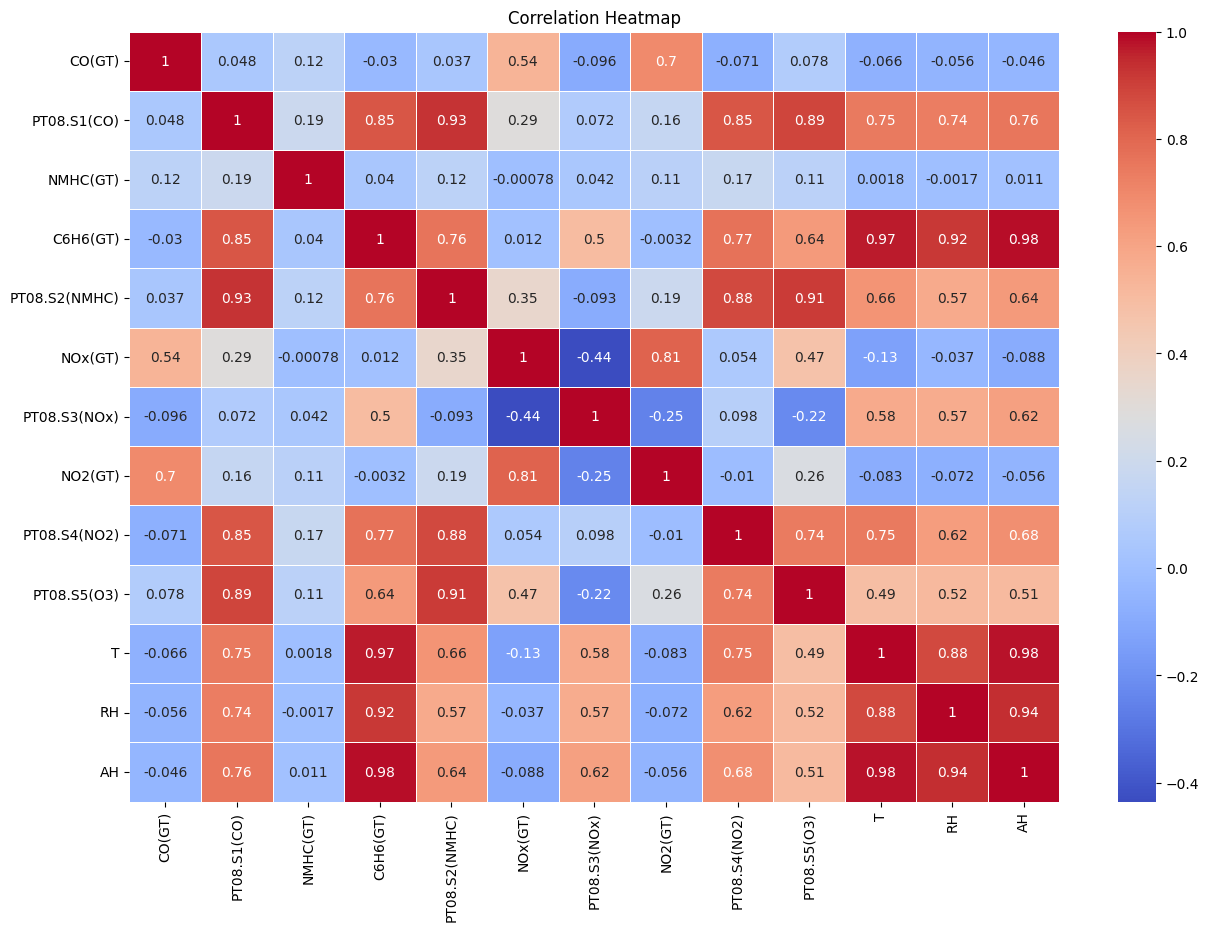

In [53]:
new_df_temp = clean_df.drop(['Date' , 'Time' , 'datetime'] , axis=1)


plt.figure(figsize=(15,10))
sns.heatmap(new_df_temp.corr() , annot=True , cmap='coolwarm' , linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()